In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [3]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


In [4]:
df_train.shape # 891 rows, 12 columns

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.duplicated().sum() # 0 valores duplicados

np.int64(0)

In [7]:
df_train.isnull().sum() # 177 en age, 687 en cabin y 2 en embarked 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.nunique() # valores unicos por columna, name, ticket, el id podriamos quitarlos, no nos sirven

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
columnas_categoricas=df_train.select_dtypes(include=['object']).columns
for column in columnas_categoricas:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [10]:
columnas_numericas=df_train.select_dtypes(include=['int64','float64']).columns
for column in columnas_numericas:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


<function matplotlib.pyplot.show(close=None, block=None)>

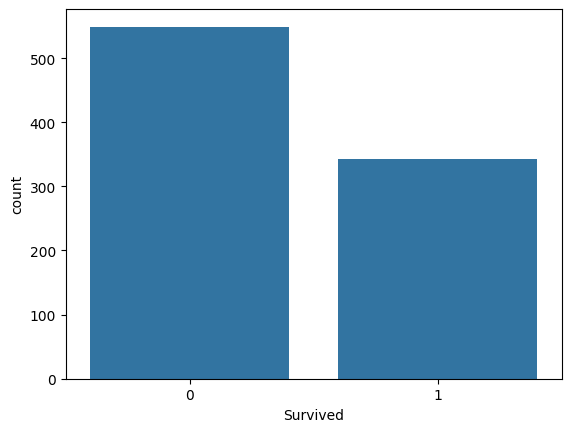

In [11]:
sns.countplot(x='Survived', data=df_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

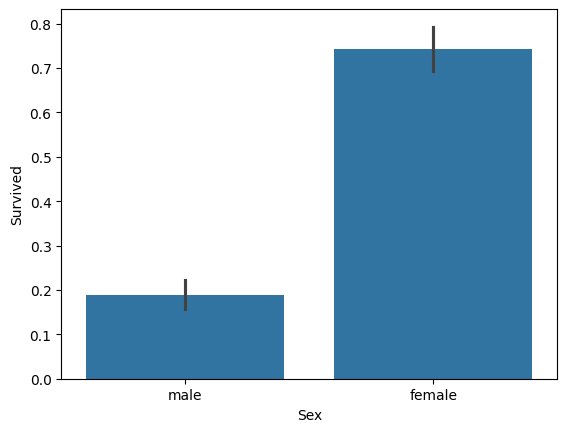

In [12]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show

# Conclusiones:
* PassengerId, Cabin, Fare, Ticket y Name no aportan a la prediccion ---> Delete

In [13]:
df_train=df_train.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_test=df_test.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


# Preparación de los datos

In [14]:
X=df_train.drop("Survived", axis=1)
y=df_train.Survived

In [15]:
s=(X.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

In [16]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


In [17]:
imputer=SimpleImputer()
x_transformed=pd.DataFrame(imputer.fit_transform(X))

x_transformed.columns=X.columns

In [18]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [19]:
model=RandomForestClassifier()
model.fit(x_transformed, y)

RandomForestClassifier()

In [20]:
df_test[object_cols] = ordinal_encoder.fit_transform(df_test[object_cols])

df_test_transformed=pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns=df_test.columns

predictions=model.predict(df_test_transformed)

# Submission

In [21]:
output=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':predictions})
output.to_csv('submission.csv', index=False)